# Nine Card Analysis

In [2]:
import sys
sys.path.append("scripts")
from gameLogic import *
from scoring import *
from strategies import *
import matplotlib.pyplot as plt

In [6]:
%%time

game = Game(player_names = ["Bailey", "Dan"],
            knock_strategies = [make_constant_score_knock_strategy(50), make_constant_score_knock_strategy(13)],
            pile_strategies = [draw_from_pile_if_completes, draw_from_pile_if_completes],
            discard_strategies = [discard_highest_useless, discard_highest_useless],
            target_score = 25, total_rounds = 5, verbose = False, random_seed = 13)

game.play_game()

Wall time: 6.66 s


In [9]:
game.players[1].score

[0, 4, 18, 44, 42, 61]

-12.2


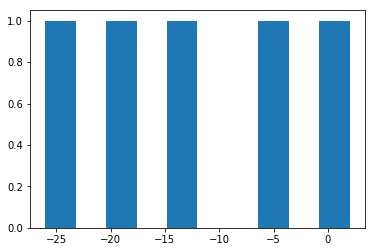

In [8]:
print(np.mean(np.diff(np.array(game.players[0].score))))
plt.hist(np.diff(np.array(game.players[0].score)));

## what do we want to store after trials:

We want:

1. to rank the strategies
2. to understand the difference between them (i.e. how much better is the advanced strategy than the basic strategy)


### what should we store:

We need:

1. player 1:
    - strategy
    - total rounds won
    - avg score per round
    - variance score per round
    - store a plot of the round scores (if possible)
    - total rounds played
2. player 2:
    - strategy
    - total rounds won
    - avg score per round
    - variance score per round
    - store a plot of the round scores (if possible)
    - total rounds played

### analysis we'll do:

For each combination of strategies, do the following:

1. 